## PCA DESCRIPTION 
## This step by step solution for PCA ##

'''
## THE Goal of PCA IS TO REDUCE THE DIMENSIONS,BY KEEPING THE ESSENCE OF THE DATA.
 
  Why PCA : - 
    1. IT's been observed that after certain stage, increamnt in the Dimneaions for model training won't improve the Accuracy of the model,
       it may even reduce it at after somepoint.
    2. As the dimensions increases the Sparsity increases which will actually reduce the model performance.
Advantage of PCA : - 
        1. As the Dimensions reduces the Computation would be faster, and resource required would for training the model would be lesser.
        
How PCA solve this :- 
    1. PCA WORKS ON THE PRINCIPAL OF DECOMPOSITION OF covariance matrix of the available features.
    2. when the fetures are projected to the eigen vector fetched from the covariance matrix, 
       it's been seen that the varince of would be maximum.
    3. so, eigen vector correspodnign to the covariance matrix will work as the Principal components. 
        
Steps TO APPLY PCA: - 
    
1. Apply the mean centerig on the feature.
2. Get the covariance matrix based on these features
3. Retrieve the Eigen vector/ Eigen Values corresponding to this covariance matrix. let's say if you want to convert 3D INTO 2D
GET THE TOP EIEN VECTOR, WHICH HAS HIGER EIGEN VALUES.
4. Project all your avaiable points on this eigen vecotr. i.e get the DOT PRODUCT OF EIGEN VECTOR TRANSPOSE MATRIX WITH THE
   TRANSFORMED FEATURES RETRIEVEED IN THE 1ST STEP.

'''

In [117]:
## Generate a random DataSet to apply the PCA ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)

In [15]:
mu_vec1

array([0, 0, 0])

In [16]:
df[:5]

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


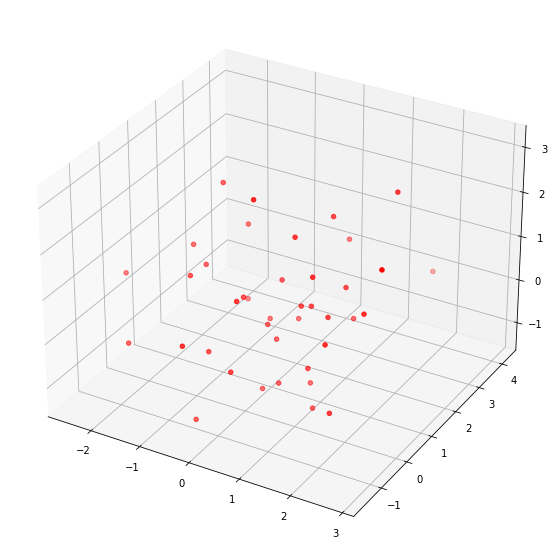

In [21]:
fig=plt.figure(figsize=(10,10))
ax= fig.add_subplot(111,projection='3d')
ax.scatter(df['feature1'],df['feature2'],df['feature3'],c='red', marker='o')

In [55]:
## 1st step, apply the mean centering to the data ##
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()
trans_x = ss.fit_transform(df.iloc[:,:3])

In [56]:
df.iloc[:,:3].describe()

,feature1,feature2,feature3
count,40.000000,40.000000,40.000000
mean,0.433721,0.460790,0.667670
std,1.157915,1.060976,1.152079
min,-2.506230,-1.632386,-1.322148
25%,-0.340600,-0.048988,-0.107669
50%,0.402744,0.423790,0.699508
75%,1.254864,1.055595,1.200931
max,2.823378,4.187503,3.150780


In [57]:
df.iloc[:,:3].skew()

feature1   -0.361667
feature2    1.049729
feature3    0.320572
dtype: float64

In [62]:
transformed_df = pd.DataFrame(trans_x,columns = ['feature1','feature2','feature3'])
transformed_df

,feature1,feature2,feature3
0,-0.700809,-1.525586,-1.749156
1,-0.224481,-1.010757,0.491251
2,-0.011456,-0.046935,-0.649616
3,1.342296,-0.962723,-1.184163
4,-2.571350,-0.299561,-0.054040
5,0.867118,0.935791,-0.426437
6,1.566196,-0.219914,0.461019
7,-0.097477,-0.382241,-1.504166
8,-1.011917,0.954984,-0.661960
9,2.090049,-0.757570,1.731490


In [71]:
## Get the Covariance matrix for the Features.
cov_mat = np.cov([transformed_df.iloc[:,0],transformed_df.iloc[:,1],transformed_df.iloc[:,2]])
cov_mat

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [73]:
## Get the Eigen value and Eign vector of the Covariance vector ##
eign_val,eign_vect=np.linalg.eig(cov_mat)

In [74]:
eign_val

array([1.3536065 , 0.94557084, 0.77774573])

In [75]:
eign_vect

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [87]:
val = eign_vect[:,0]
evalue = eign_val[0]
val*evalue

array([-0.72926789, -0.88807855, -0.71535683])

In [88]:
val = eign_vect[:,1]
evalue = eign_val[1]
val*evalue

array([-0.65587905, -0.01000032,  0.68104837])

In [90]:
val = eign_vect[:,2]
evalue = eign_val[2]
val*evalue

array([ 0.37186655, -0.58689814,  0.34950574])

# '''
Apply linear transforamtion of Covariance matrix on the 
Eigen vector will result in a Matrix that is Eigen_values times scaled on the Eigen vector.
'''

## Now we have our eigen vector and eigen values ##
## NEXT STEP : -- 
## Project the features on these Eigen vector .. 

In [103]:
## Let's say we want to convert these features into 2D.
## Select 2 eigen vectors
pc = eign_vect[:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [104]:
pc_trans = pc.T
pc_trans

array([[-0.53875915, -0.65608325],
       [-0.69363291, -0.01057596],
       [ 0.47813384, -0.75461442]])

In [105]:
transformed_df.shape

(40, 3)

##  I/P matrix has (40,3) in original DF  (3,2) in pc_trans 
## o/p matrix will have 40 2

In [114]:
dot_prod =np.dot(transformed_df.iloc[:,0:3],pc_trans)
df_pc = pd.DataFrame(dot_prod,columns=['pc1','pc2'])
df_pc['Target'] = df['target']

In [118]:
## Here PC1 AND PC2 are the two dimensions, the original data in 3D got converted into 2D, post PCA.

df_pc

,pc1,pc2,Target
0,0.599433,1.795862,1
1,1.056919,-0.212737,1
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1
5,-1.320157,-0.257002,1
6,-0.470834,-1.373121,1
7,-0.401542,1.203061,1
8,-0.433734,1.153326,1
9,0.227326,-2.669841,1
